In [95]:
import numpy as np
import scipy.misc
import cv2

import glob

import matplotlib.pyplot as plt
import thinning as th
%matplotlib inline

In [96]:
scale = 1./8 #0.125
conversion = 0.6463

In [97]:
masks = glob.glob('./masks_171122/MaskPG14-29-5-17ML/*.tif')
result_dir = './masks_171122/MaskPG14-29-5-17ML/'
masks

['./masks_171122/MaskPG14-29-5-17ML/Mask6-2a-2ML.tif',
 './masks_171122/MaskPG14-29-5-17ML/10-6-2MLmask.tif',
 './masks_171122/MaskPG14-29-5-17ML/Mask6-2bisML.tif',
 './masks_171122/MaskPG14-29-5-17ML/BOx7-3-2MLmask.tif',
 './masks_171122/MaskPG14-29-5-17ML/BOx7-3-1MLmask.tif',
 './masks_171122/MaskPG14-29-5-17ML/Mask6-2a-1ML.tif',
 './masks_171122/MaskPG14-29-5-17ML/BOX10-6a-1ML.tif',
 './masks_171122/MaskPG14-29-5-17ML/Mask7-3a-2ML.tif']

In [98]:
results = {}

In [99]:
for filename in masks:
    mask_name = str.split(str.split(filename,'/')[-1],'.')[0]
    #read
    mask = cv2.imread(filename)
    #rescale
    mask1 = scipy.misc.imresize(mask, scale) 
    #grayscale
    mask_g = cv2.cvtColor(mask1, cv2.COLOR_BGR2GRAY)
    #threshold
    ret, mask_bw = cv2.threshold(mask_g, 127, 255, cv2.THRESH_BINARY)
    #invert
    mask_bw = 255 - mask_bw
    # write mask to file
    cv2.imwrite(result_dir+mask_name+'_msk.jpg',mask_bw)
    # thinning algo
    bw2 = th.thinning(mask_bw)
    # save thinned image
    cv2.imwrite(result_dir+mask_name+'_thin.jpg',bw2)
    # distance transform
    # OpenCV 3
    #dist = cv2.distanceTransform(mask_bw, cv2.DIST_L2, cv2.DIST_MASK_PRECISE)
    
    # OpenCV 2
    dist = cv2.distanceTransform(mask_bw, cv2.cv.CV_DIST_L2, cv2.cv.CV_DIST_MASK_PRECISE)
    # save dist transf image
    cv2.imwrite(result_dir+mask_name+'_dt.jpg',dist)
    # compute thickness
    th_values = 2*dist[np.where(bw2>0.0)] / scale * conversion
    results[mask_name] = (np.mean(th_values), np.std(th_values), len(th_values))

In [100]:
print results

{'Mask6-2a-1ML': (115.27302, 40.431, 2916), 'BOx7-3-2MLmask': (94.39505, 32.606609, 3120), 'Mask6-2a-2ML': (108.97678, 37.366245, 3254), '10-6-2MLmask': (121.53197, 30.03651, 3063), 'Mask7-3a-2ML': (110.84126, 30.035727, 3265), 'Mask6-2bisML': (112.7478, 34.164009, 3086), 'BOx7-3-1MLmask': (107.58983, 28.024303, 3010), 'BOX10-6a-1ML': (118.69422, 31.147974, 3329)}


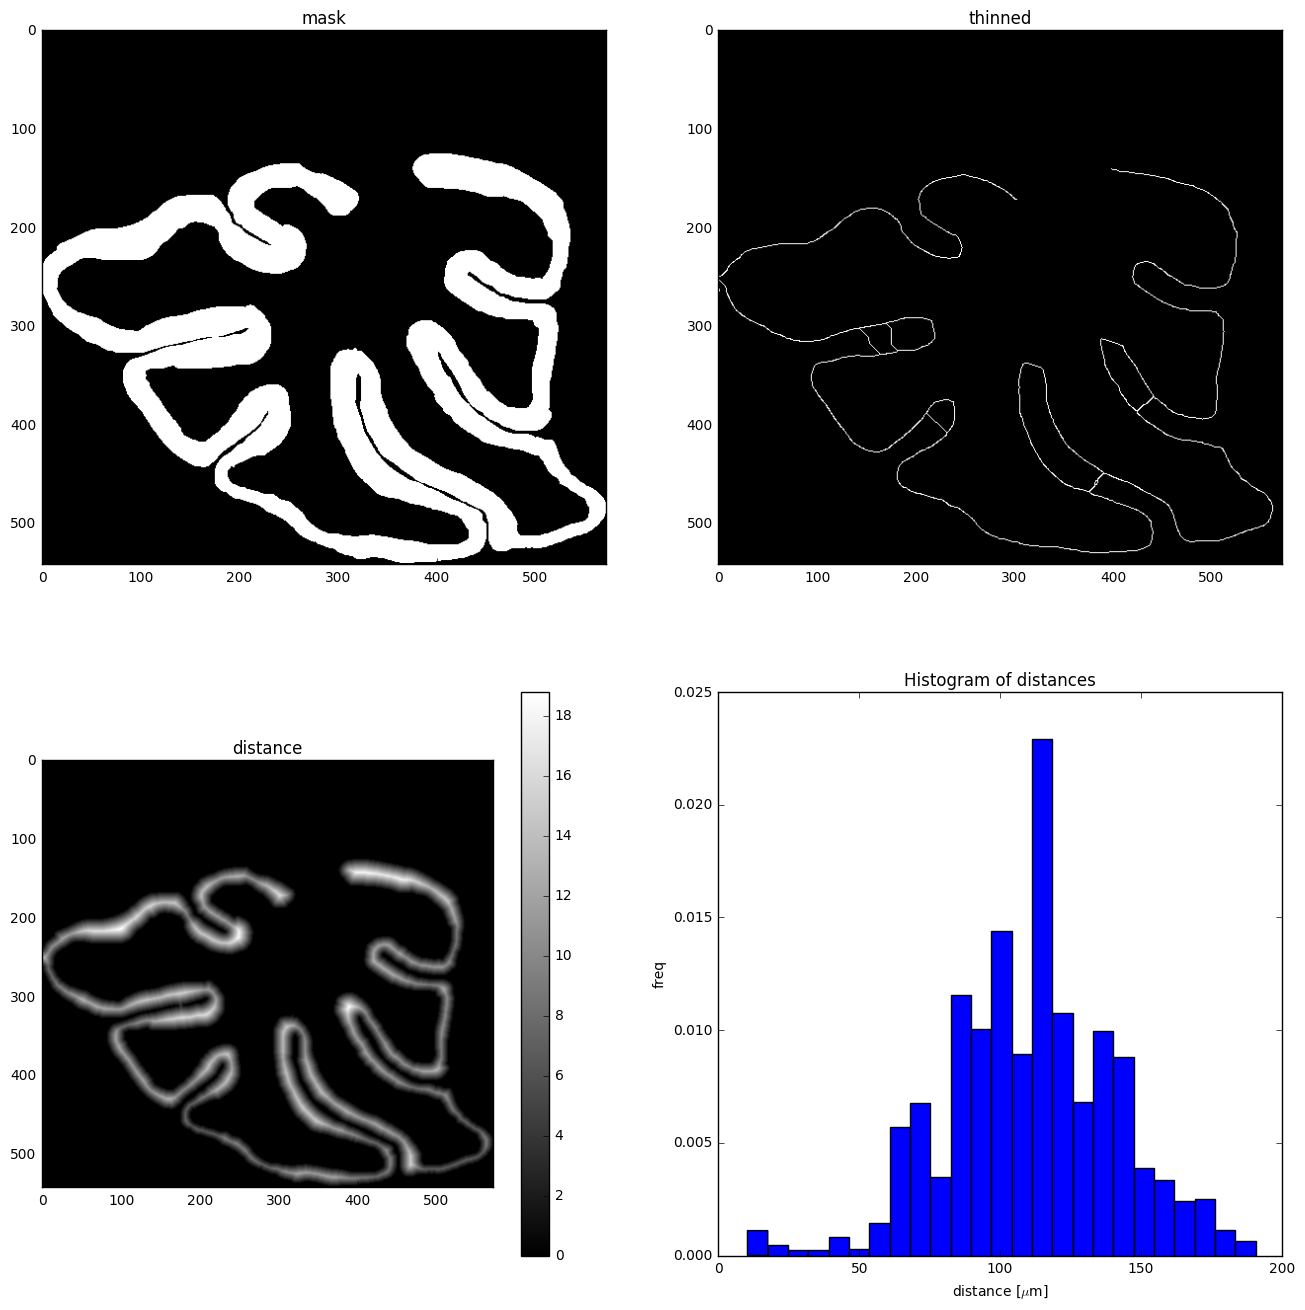

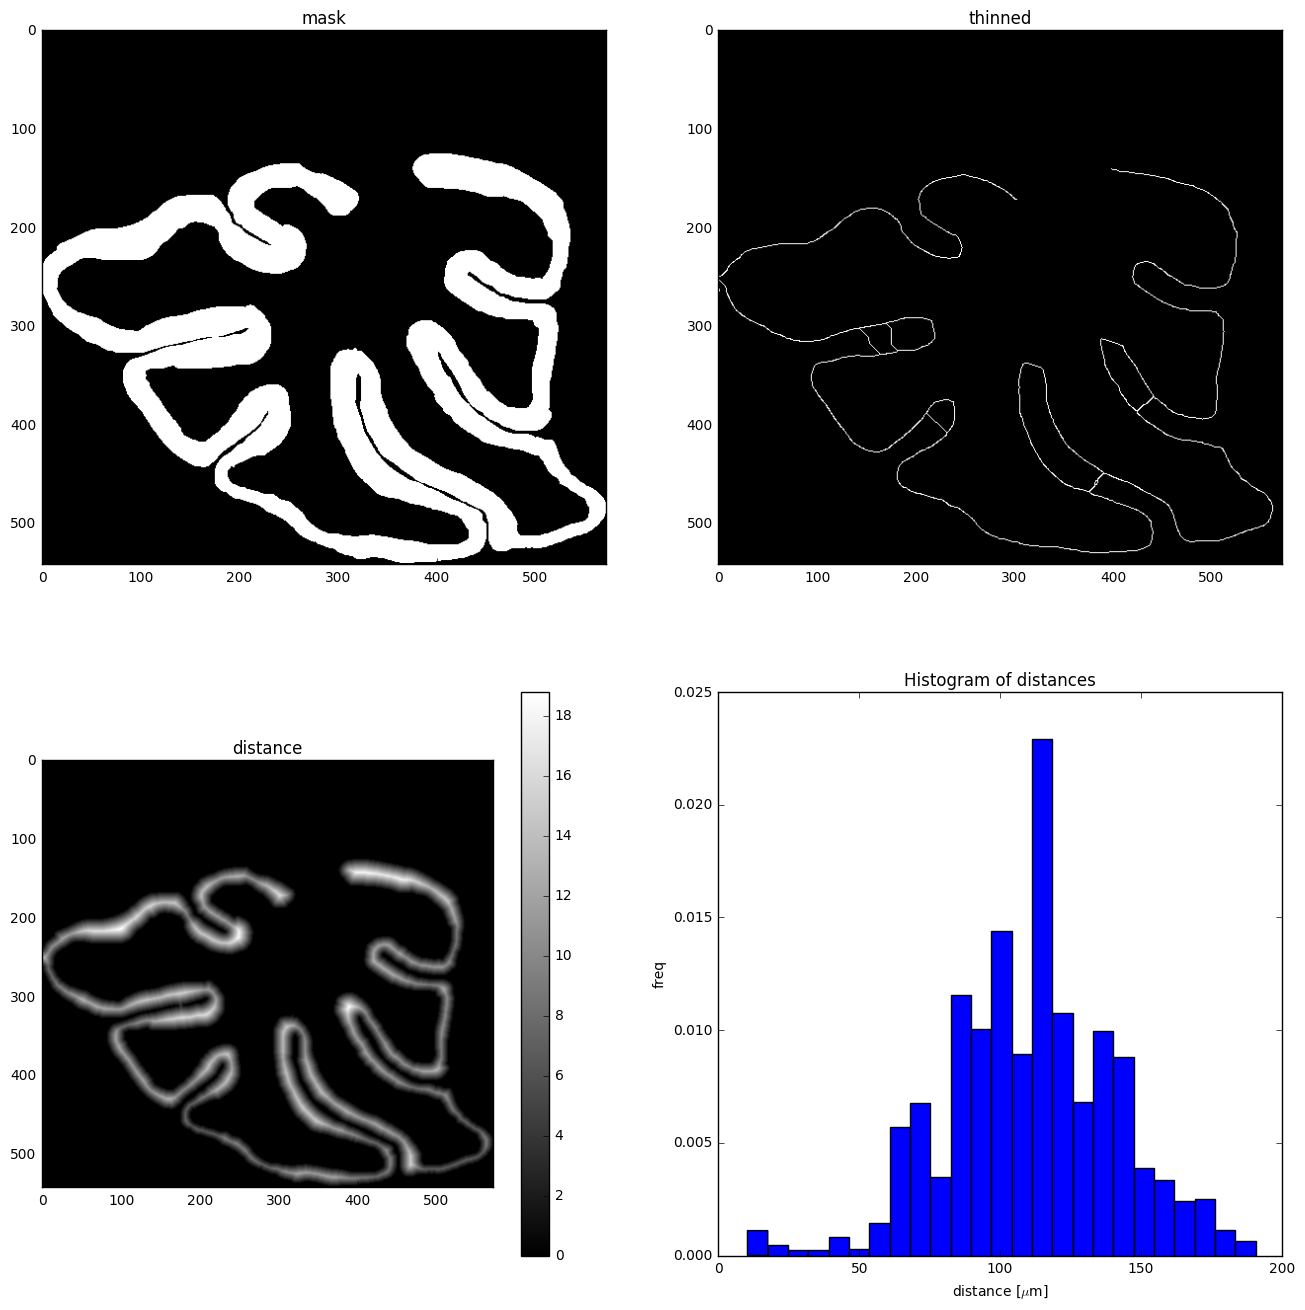

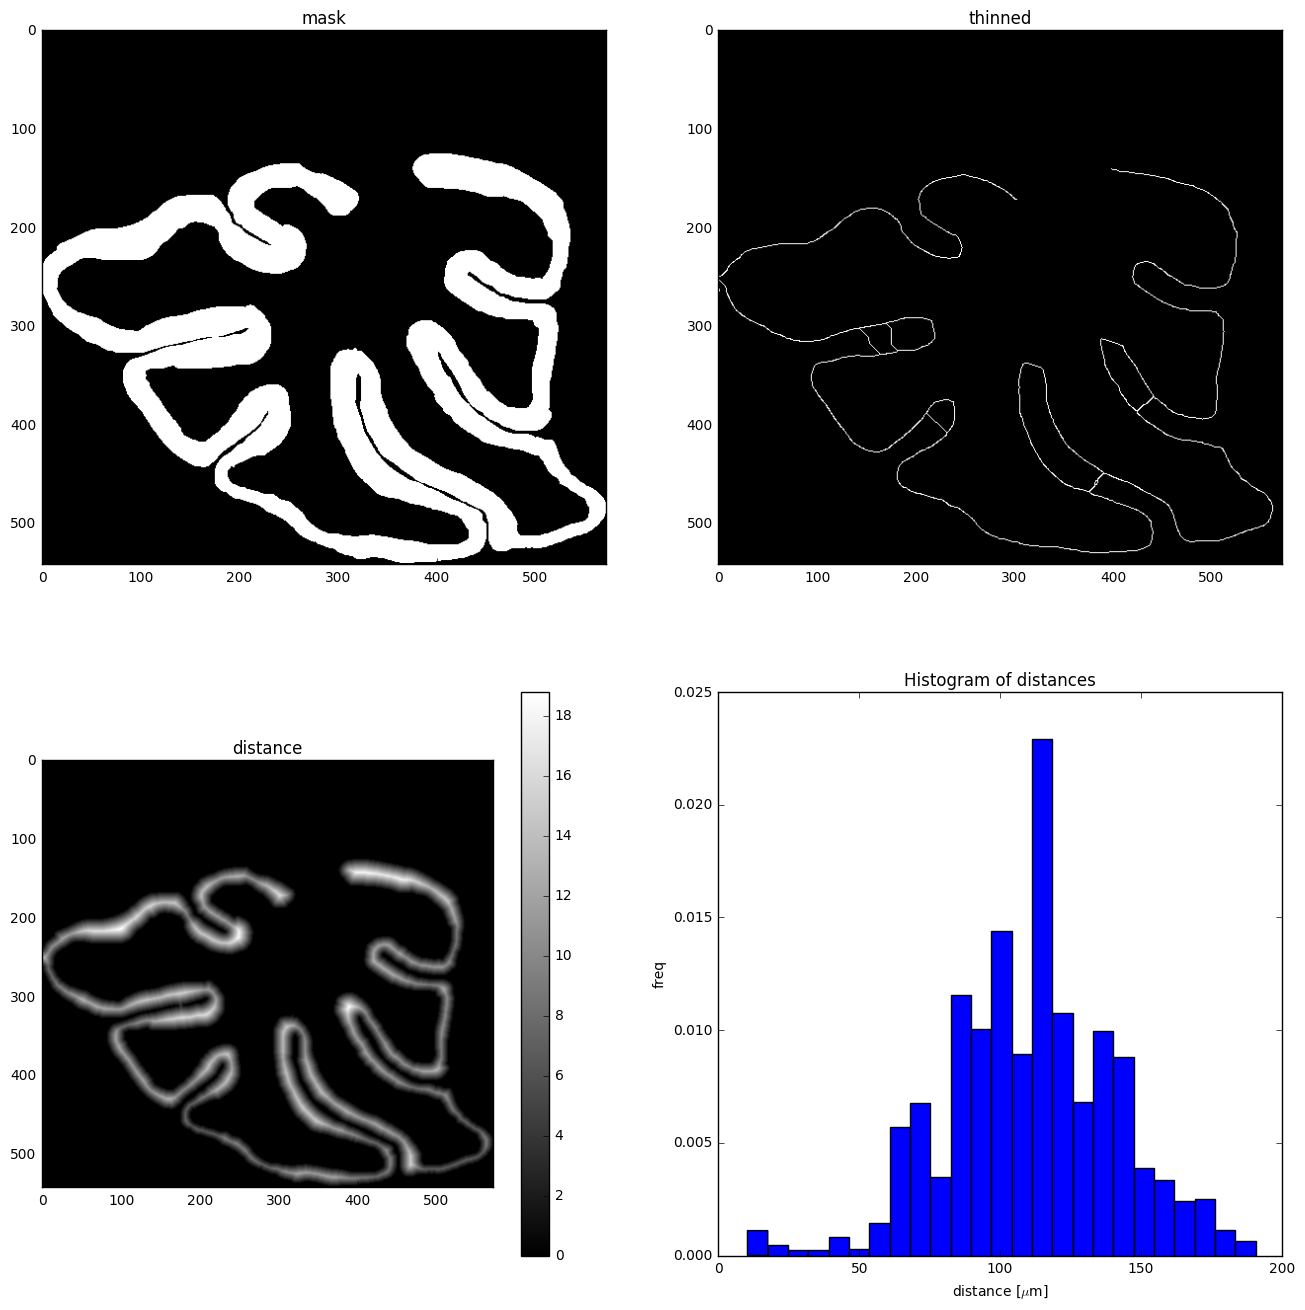

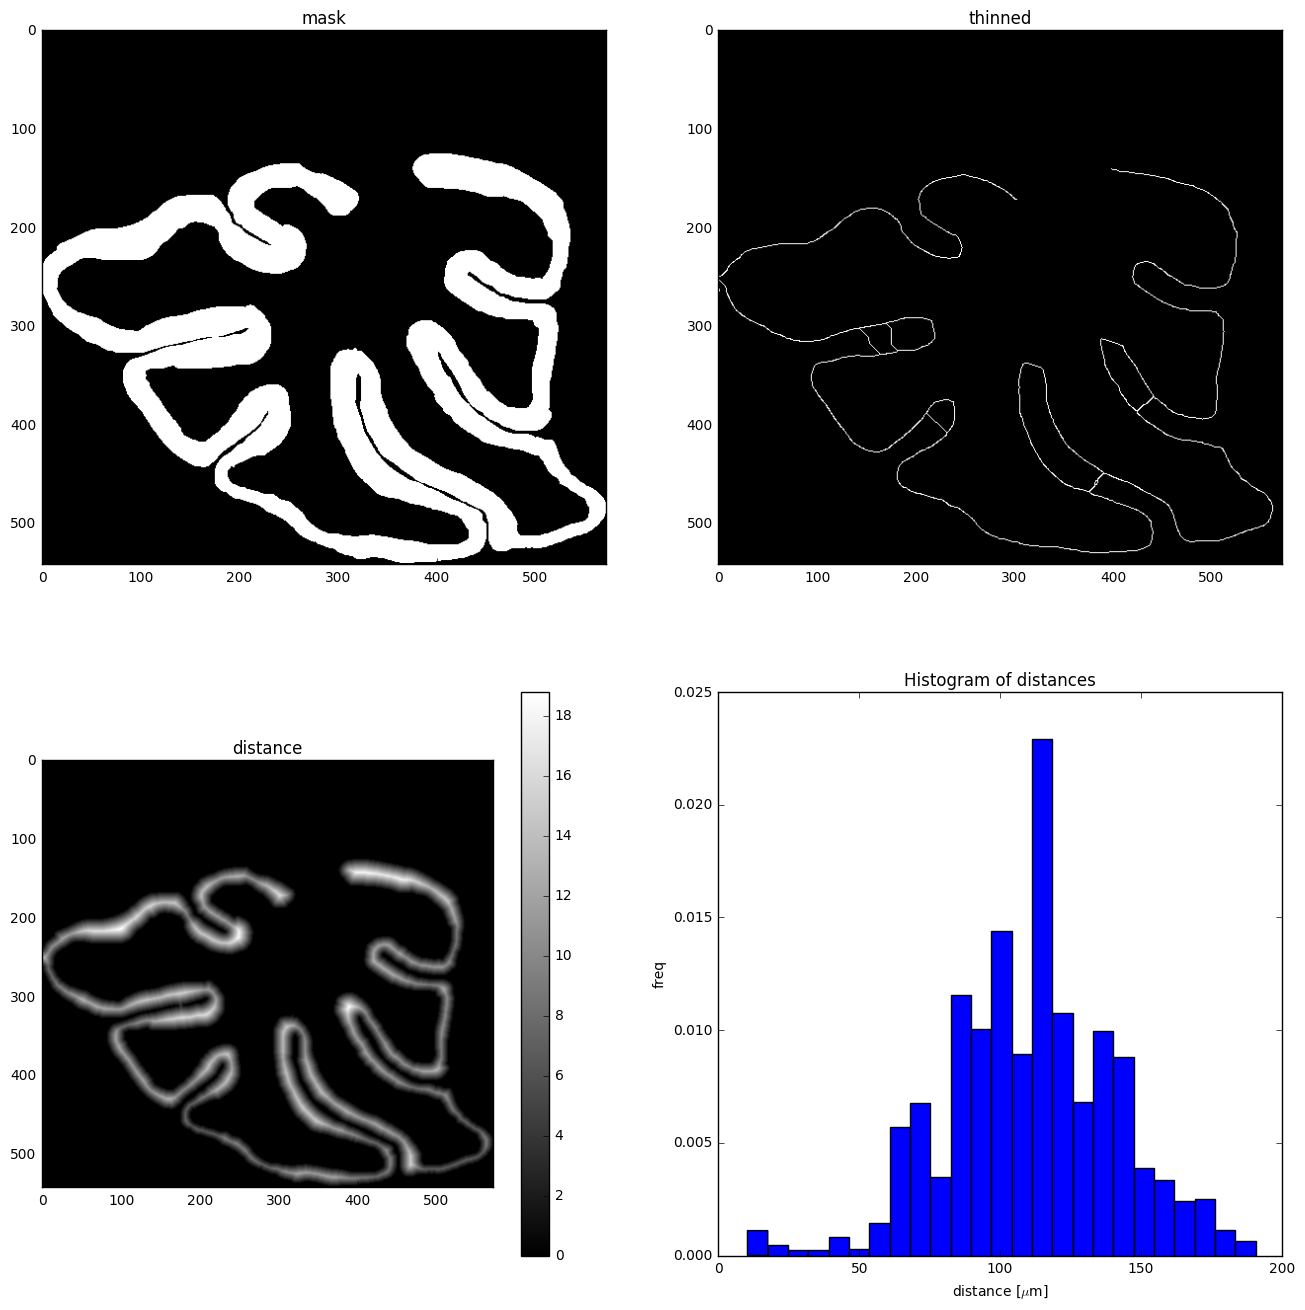

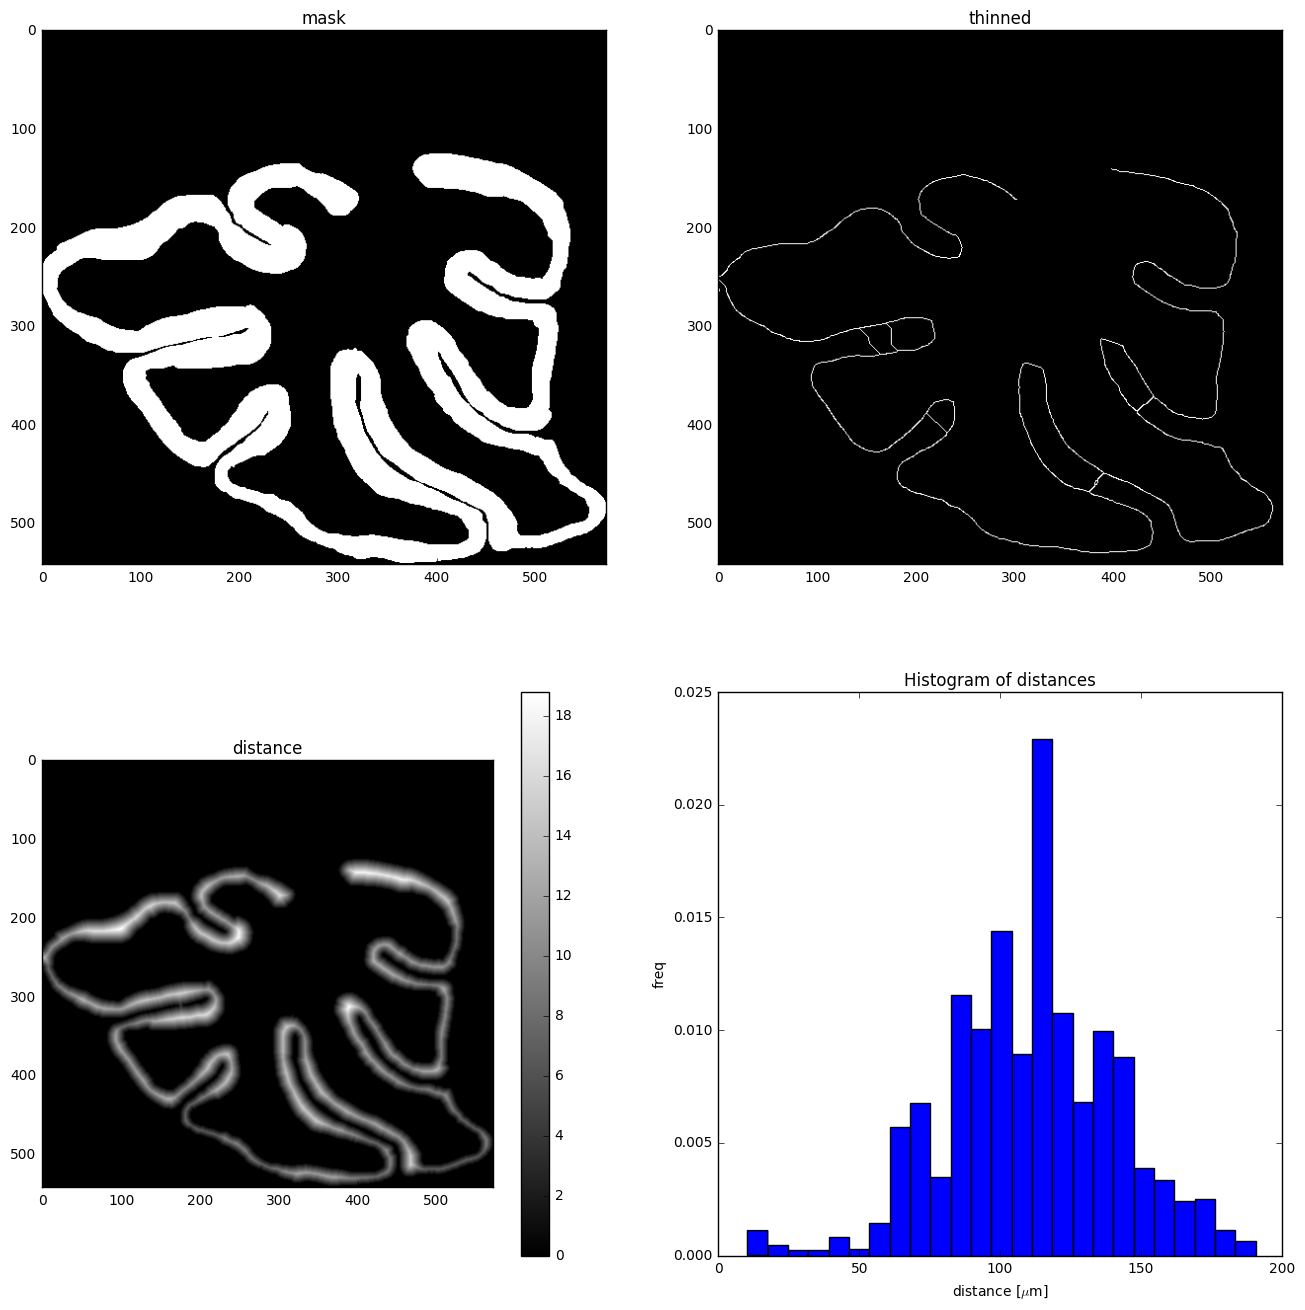

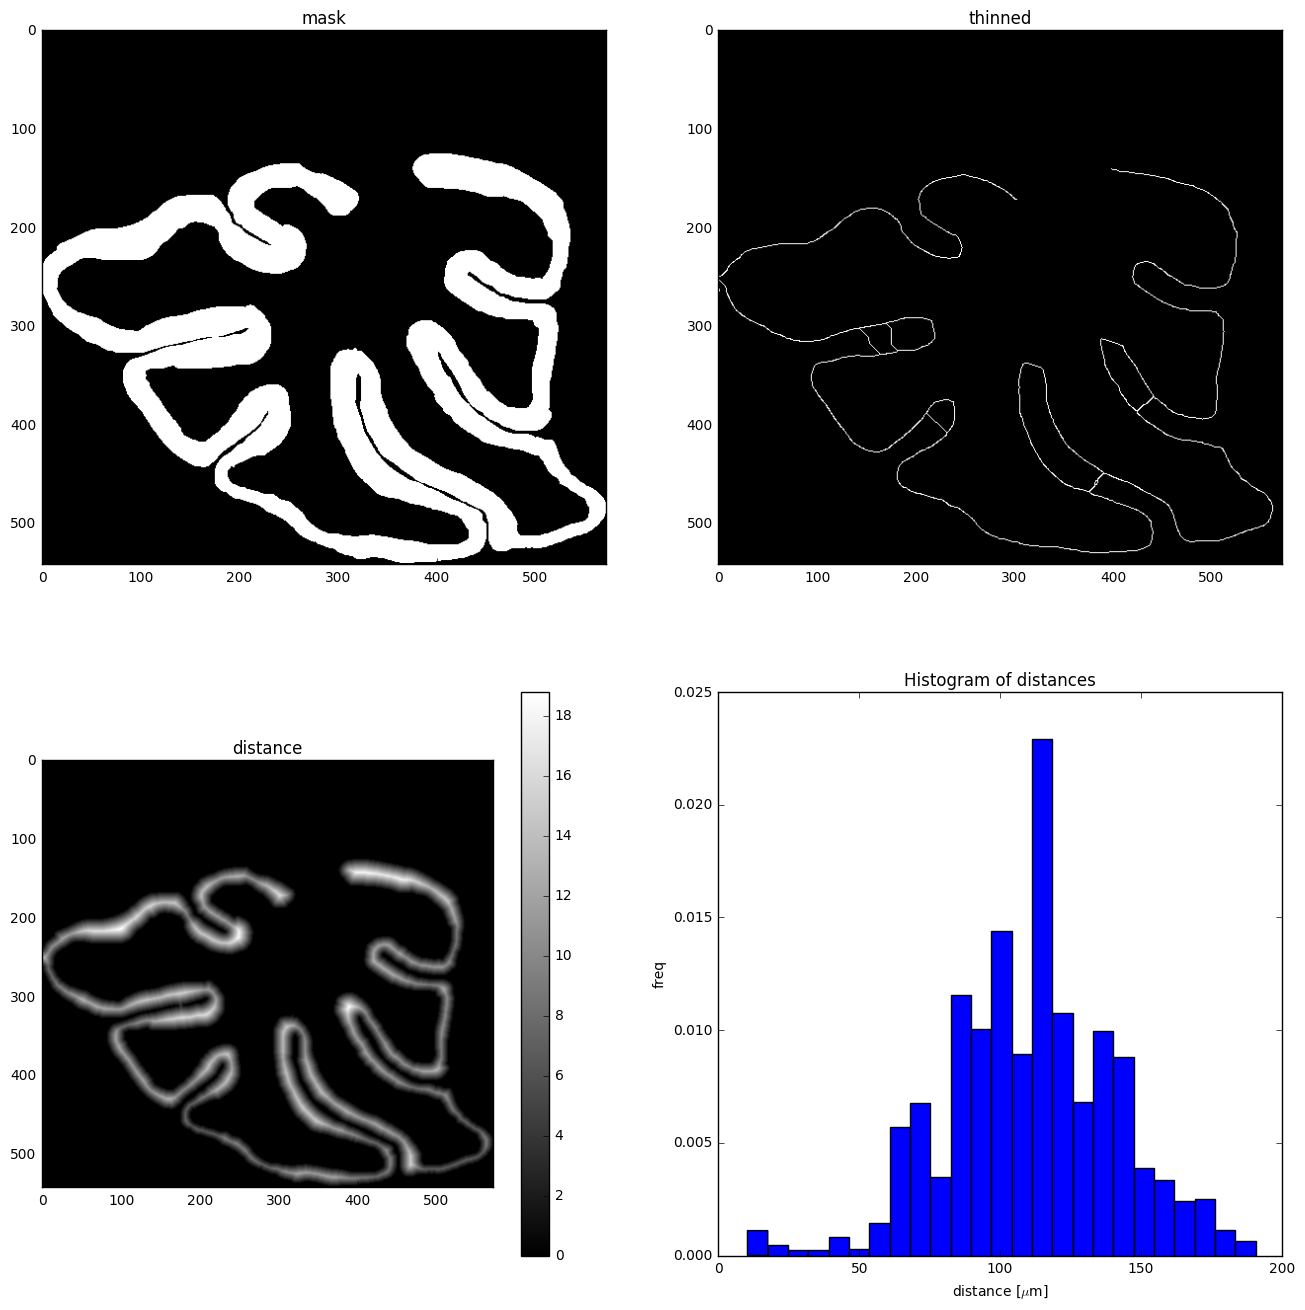

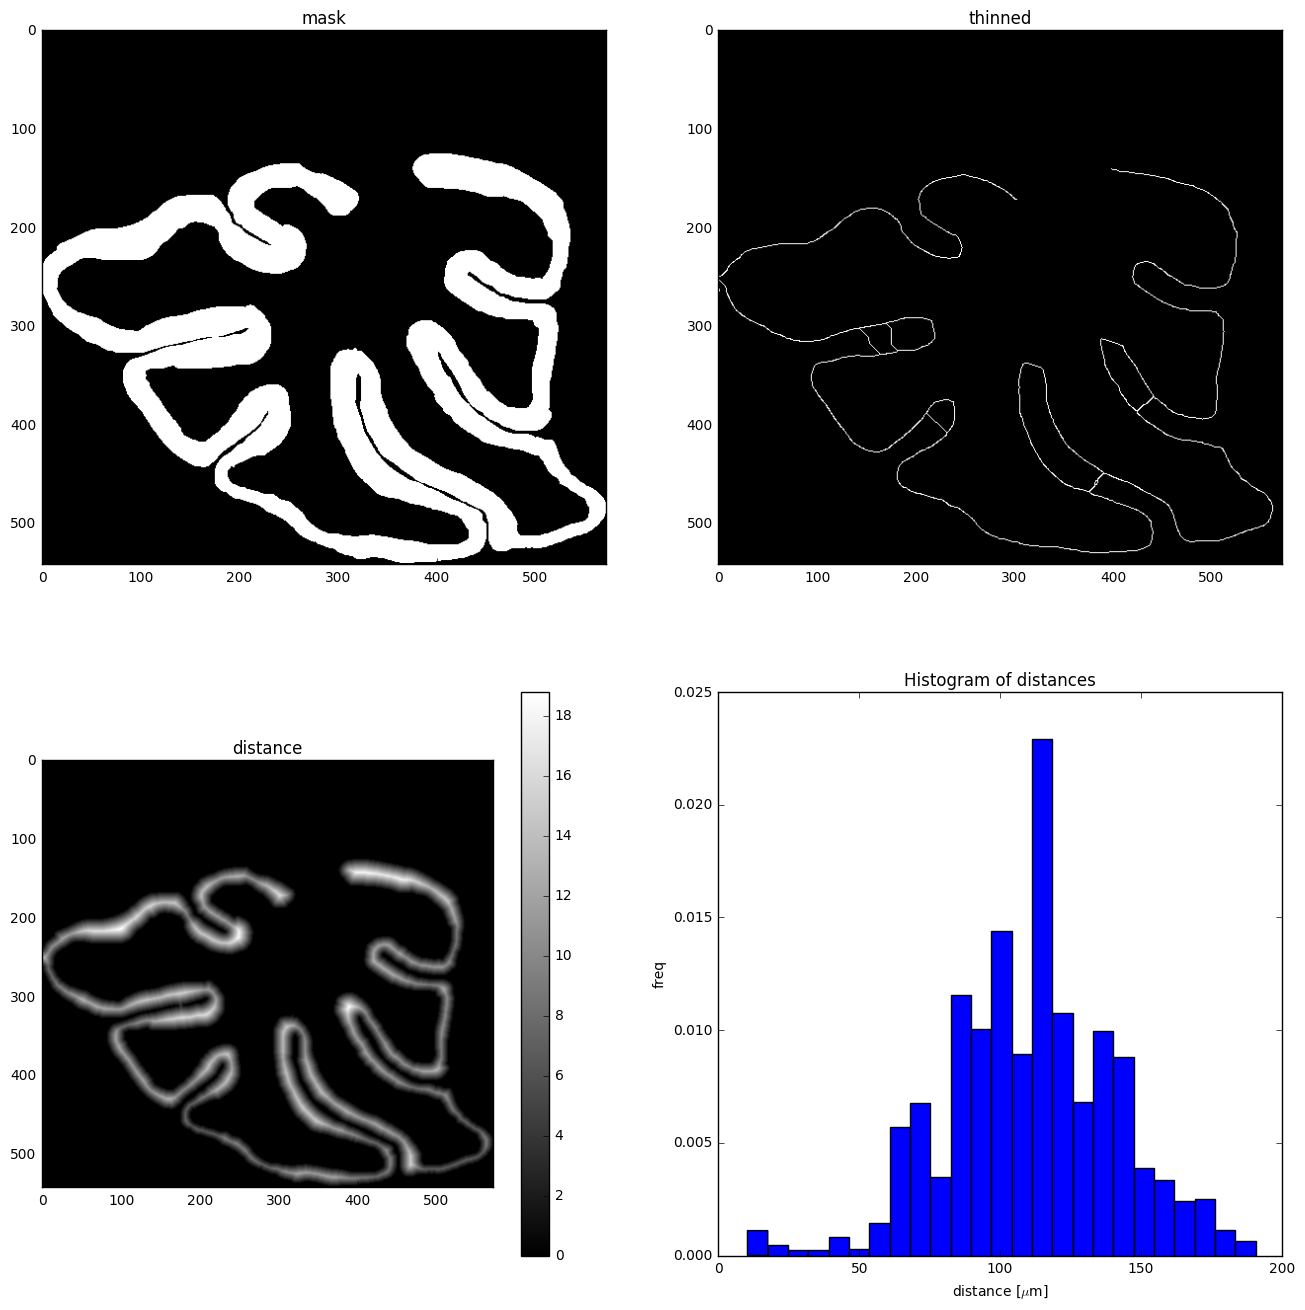

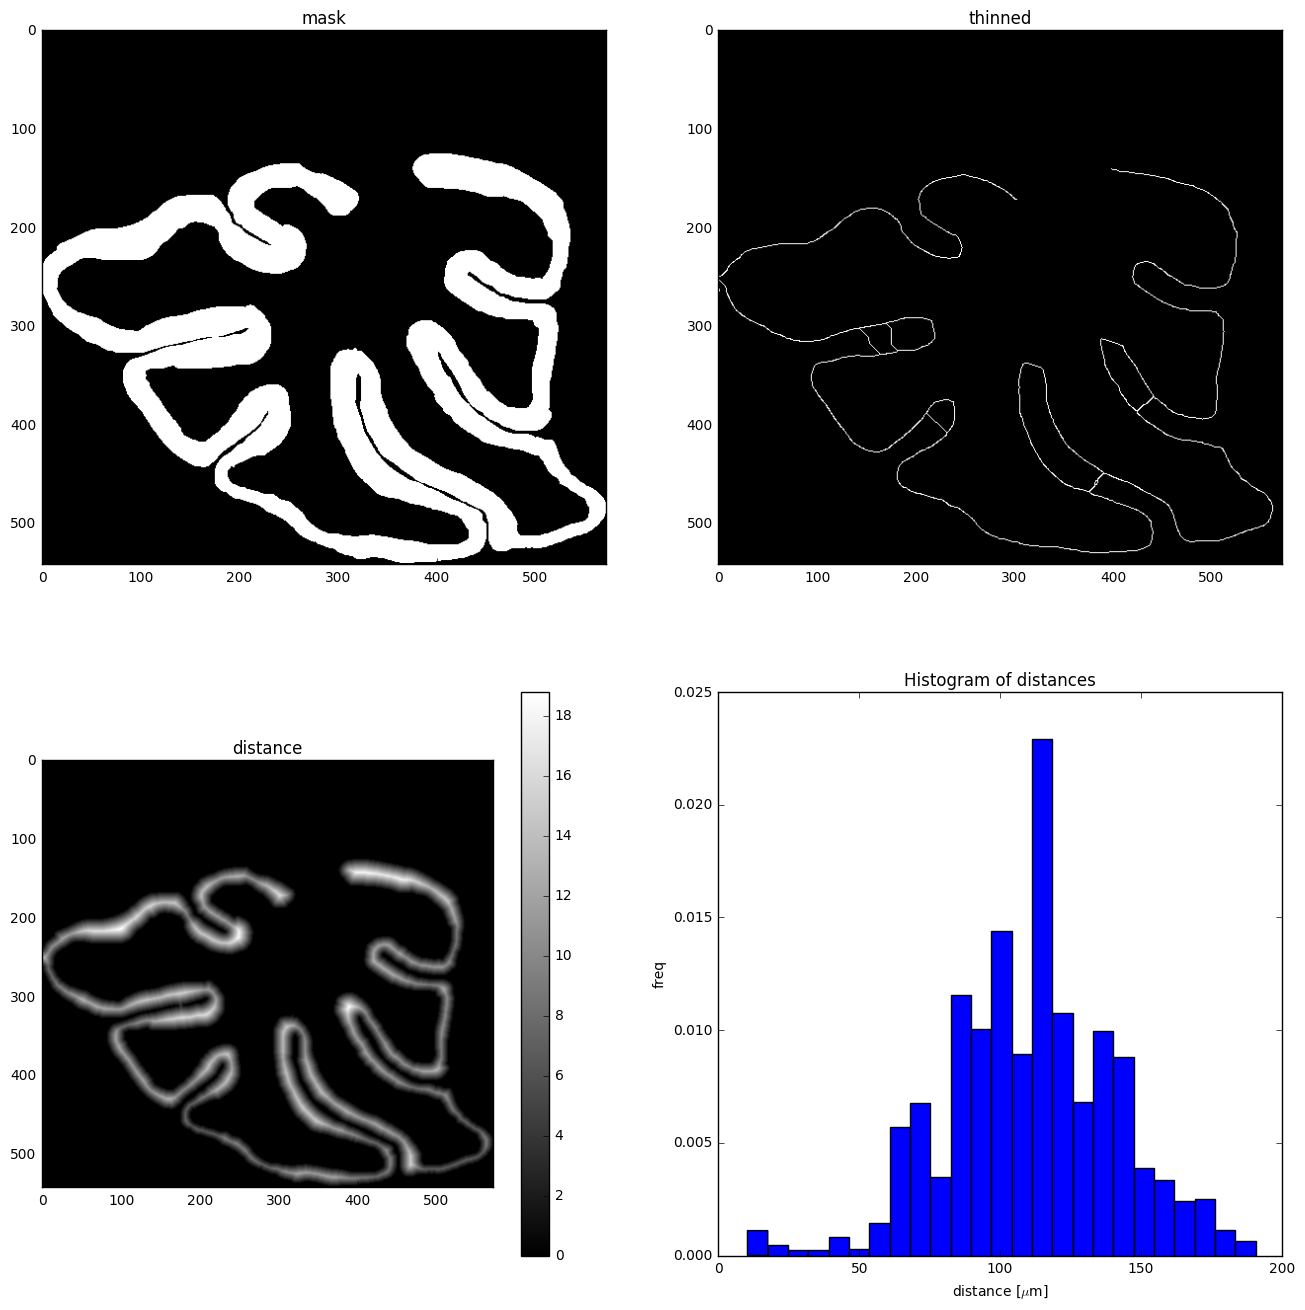

In [101]:
for mask in results:
    plt.figure(figsize=(16,16))
    plt.subplot(221)
    plt.title('mask')
    plt.imshow(mask_bw,cmap='gray')
    plt.subplot(222)
    plt.title('thinned')
    plt.imshow(bw2,cmap='gray')
    plt.subplot(223)
    plt.title('distance')
    plt.imshow(dist,cmap='gray')
    plt.colorbar()
    plt.subplot(224)
    #n, bins, patches = 
    #plt.hist(th_values,bins=int(np.ceil(1.87*len(th_values-1)**0.4)),normed=1, histtype='bar')
    plt.hist(th_values,bins=25,normed=1, histtype='bar')
    plt.title('Histogram of distances')
    plt.xlabel(r'distance [$\mu$m]')
    #plt.text(0.6,0.2,r'$\mu$ = {0:.2f} | $\sigma$ = {1:.2f}'.format(results[mask][0],results[mask][1]))
    plt.ylabel('freq')
    plt.savefig(result_dir+mask+'_sp.png');

In [102]:
masks

['./masks_171122/MaskPG14-29-5-17ML/Mask6-2a-2ML.tif',
 './masks_171122/MaskPG14-29-5-17ML/10-6-2MLmask.tif',
 './masks_171122/MaskPG14-29-5-17ML/Mask6-2bisML.tif',
 './masks_171122/MaskPG14-29-5-17ML/BOx7-3-2MLmask.tif',
 './masks_171122/MaskPG14-29-5-17ML/BOx7-3-1MLmask.tif',
 './masks_171122/MaskPG14-29-5-17ML/Mask6-2a-1ML.tif',
 './masks_171122/MaskPG14-29-5-17ML/BOX10-6a-1ML.tif',
 './masks_171122/MaskPG14-29-5-17ML/Mask7-3a-2ML.tif']

In [103]:
import pprint

In [104]:
pprint.pprint(results)

{'10-6-2MLmask': (121.53197, 30.03651, 3063),
 'BOX10-6a-1ML': (118.69422, 31.147974, 3329),
 'BOx7-3-1MLmask': (107.58983, 28.024303, 3010),
 'BOx7-3-2MLmask': (94.39505, 32.606609, 3120),
 'Mask6-2a-1ML': (115.27302, 40.431, 2916),
 'Mask6-2a-2ML': (108.97678, 37.366245, 3254),
 'Mask6-2bisML': (112.7478, 34.164009, 3086),
 'Mask7-3a-2ML': (110.84126, 30.035727, 3265)}
